In [32]:

#ex 1 transforming data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

dataSet = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataSet.dropna(inplace=True) 

numerical_data =  dataSet.select_dtypes(include=[np.number]).columns.tolist()
scaler = preprocessing.StandardScaler()

dataSet[numerical_data] = scaler.fit_transform(dataSet[numerical_data])
categorical_features = dataSet.select_dtypes(exclude=[np.number]).columns.tolist()

encoderObject = preprocessing.OrdinalEncoder()
dataSet[categorical_features] = encoderObject.fit_transform(dataSet[categorical_features])
    
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911890,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.160323,-0.398608,0.0
1,0.216906,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,-0.259629,-0.948762,0.0
2,-0.470701,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.362660,-1.641883,1.0
3,0.990587,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,-0.746535,-0.983710,0.0
4,1.470632,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.197365,-1.235224,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.665992,-0.879397,0.0
7039,-0.981733,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.277533,1.292099,0.0
7040,-0.075745,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.168632,-0.139680,0.0
7041,1.186835,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.320338,-0.316534,1.0


Lin regr score training: 0.95
Lin regr score test: 0.94


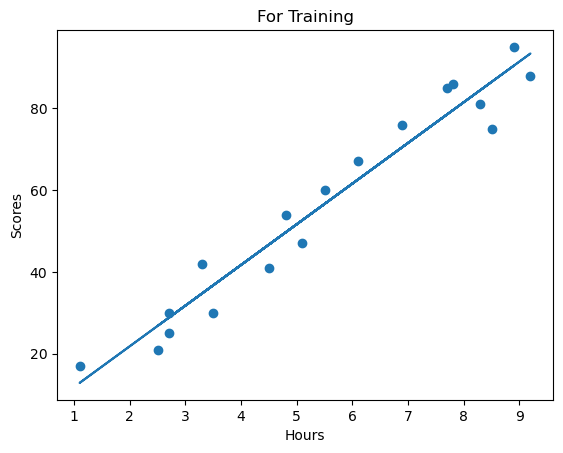

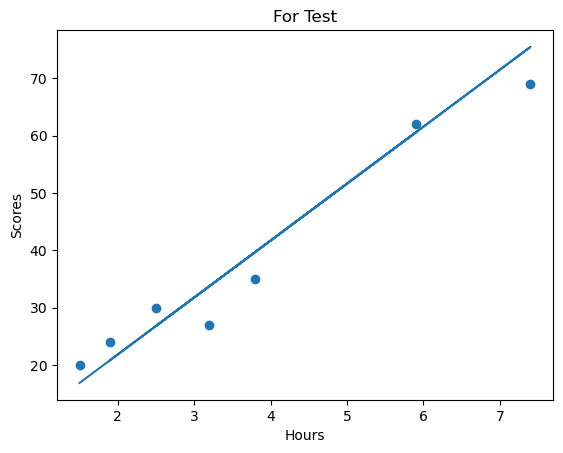

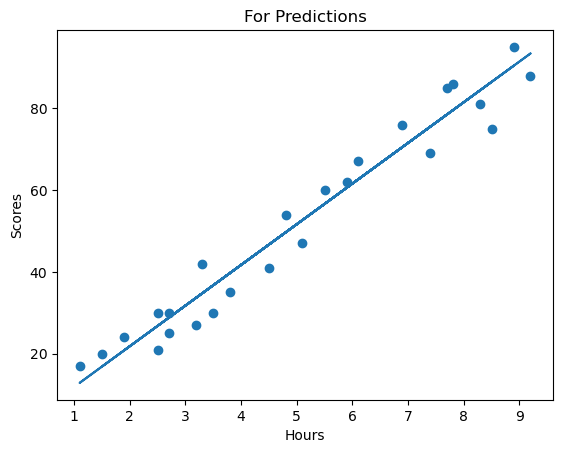

In [17]:
#exercise 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('score.csv')

X = np.array(dataset['Hours'])
Y = np.array(dataset['Scores'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

X = X.reshape(-1, 1)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

linear_regression = LinearRegression().fit(X_train, Y_train)

print(f"Lin regr score training: {linear_regression.score(X_train, Y_train):.2f}")
print(f"Lin regr score test: {linear_regression.score(X_test, Y_test):.2f}")
linear_regression.predict([[5], [16], [34]])
plt.scatter(X_train, Y_train)
plt.plot(X_train, linear_regression.predict(X_train))

plt.title('For Training')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
plt.scatter(X_test, Y_test)
plt.plot(X_test, linear_regression.predict(X_test))

plt.title('For Test')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
plt.scatter(X, Y)
plt.plot(X, linear_regression.predict(X))

plt.title('For Predictions')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()



In [30]:

#ex 3 perform all three regularizations
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
ridge = Ridge(alpha=0.7).fit(X_train, Y_train)

print("Ridge reg")
print(f"Ridge regr training score: {ridge.score(X_train, Y_train):.2f}")
print(f"Ridge regr test score: {ridge.score(X_test, Y_test):.2f}\n")

lasso = Lasso(alpha=1.0).fit(X_train, Y_train)

print("Lasso reg")
print(f"Lasso regr training score: {lasso.score(X_train, Y_train):.2f}")
print(f"Lasso regr test score: {lasso.score(X_test, Y_test):.2f}\n")

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, Y_train)

print("Elastic Net")
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, Y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, Y_test):.2f}")


Ridge reg
Ridge regr training score: 0.95
Ridge regr test score: 0.94

Lasso reg
Lasso regr training score: 0.95
Lasso regr test score: 0.94

Elastic Net
Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
